## Linegraph showing GLA Claimant rate

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
data_path = "~/library/data/processed/youth-claimants-rate.csv" #use csv file
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,Code,Area,2011,2012,2013,2014,2015
0,0,E09000001,City of London,6.172840,3.579952,1.213592,1.165501,1.633987
1,1,E09000002,Barking and Dagenham,22.734367,17.159529,12.413395,7.251567,4.496664
2,2,E09000003,Barnet,9.944418,7.347304,5.378373,3.474655,1.937492
3,3,E09000004,Bexley,10.870386,8.291568,5.661215,3.780993,2.853710
4,4,E09000005,Brent,14.681718,12.438708,9.532505,6.097141,3.078245


In [6]:
df = df[df['Area']=='London']

In [7]:
df = df.melt(var_name='Year', value_name='Claimant_rate')

In [8]:
df

,Year,Claimant_rate
0,Unnamed: 0,36
1,Code,E12000007
2,Area,London
3,2011,14.34
4,2012,11.4141
5,2013,8.15765
6,2014,5.24108
7,2015,3.57434


In [9]:
df.drop(0, axis=0, inplace=True)
df.drop(1, axis=0, inplace=True)
df.drop(2, axis=0, inplace=True)

df.Claimant_rate = df.Claimant_rate.astype(float)
df.Year = df.Year.astype(int)

In [10]:
df.Claimant_rate.mean()

8.54542863563272

In [11]:
data_path = "~/library/data/processed/all-claimants-rate.csv" #use csv file
df2 = pd.read_csv(data_path)

df2.head()

,Unnamed: 0,Code,Area,2011,2012,2013,2014,2015
0,0,E09000001,City of London,2.359502,2.204409,1.794974,1.375246,0.811853
1,1,E09000002,Barking and Dagenham,9.411043,8.615790,5.992832,3.977606,2.987153
2,2,E09000003,Barnet,4.095892,3.763478,2.884898,2.044512,1.568456
3,3,E09000004,Bexley,4.233409,3.936158,2.865763,1.926917,1.558947
4,4,E09000005,Brent,6.363182,6.360795,4.985824,3.668681,2.885393


In [12]:
df2 = df2[df2['Area']=='London']
df2 = df2.melt(var_name='Year', value_name='Claimant_rate')
df2.drop(0, axis=0, inplace=True)
df2.drop(1, axis=0, inplace=True)
df2.drop(2, axis=0, inplace=True)
df2.Claimant_rate = df2.Claimant_rate.astype(float)
df2.Year = df2.Year.astype(int)
df2

,Year,Claimant_rate
3,2011,5.753901
4,2012,5.301598
5,2013,4.021036
6,2014,2.810122
7,2015,2.229269


In [13]:
df2.Claimant_rate.mean()

4.023185380349522

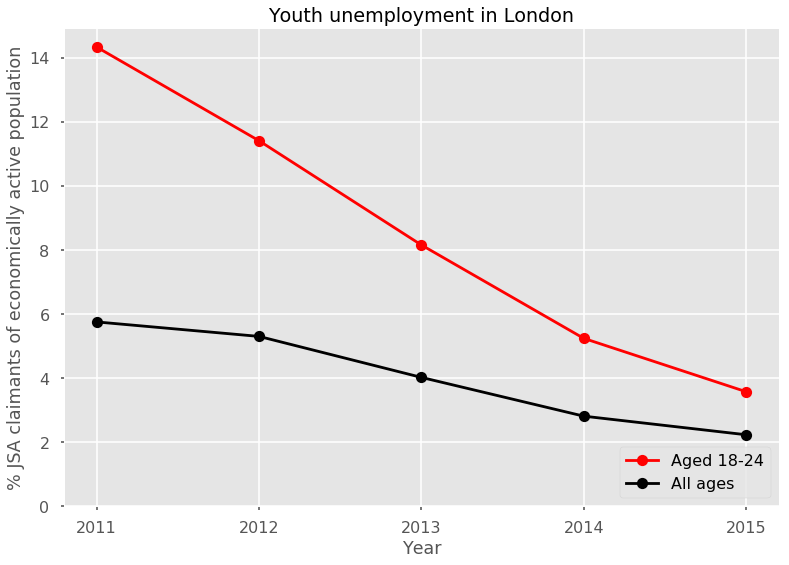

In [14]:
plt.style.use('seaborn-poster')
ax = df.plot(x='Year', y= 'Claimant_rate', kind='line', c = 'red', marker= 'o', label = 'Aged 18-24')
df2.plot(x='Year', y= 'Claimant_rate', kind='line', c = 'black', marker= 'o', ax=ax, label = 'All ages')
ax.legend(loc='lower right')
plt.title("Youth unemployment in London")
plt.ylabel("""% JSA claimants of economically active population""")
plt.xticks(df['Year'])
plt.ylim(bottom=0)
plt.savefig('./data/YouthUnemploymentLondon.png')

## Interactive map showing ∆ youth unemployment - unemployment

### create ∆ youth unemployment - unemployment

In [2]:
data_path = "~/library/data/processed/borough-unemployment-and-business-data.csv" #use csv file
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3
1,1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5
2,2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2
3,3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2
4,4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data_path = "~/library/data/processed/all-claimants-rate.csv" #use csv file
df2 = pd.read_csv(data_path)

df2.head()

,Unnamed: 0,Code,Area,2011,2012,2013,2014,2015
0,0,E09000001,City of London,2.359502,2.204409,1.794974,1.375246,0.811853
1,1,E09000002,Barking and Dagenham,9.411043,8.615790,5.992832,3.977606,2.987153
2,2,E09000003,Barnet,4.095892,3.763478,2.884898,2.044512,1.568456
3,3,E09000004,Bexley,4.233409,3.936158,2.865763,1.926917,1.558947
4,4,E09000005,Brent,6.363182,6.360795,4.985824,3.668681,2.885393


In [5]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.dropna(how='any', inplace=True)
df2.rename(columns={'Code':'code', 'Area':'area'}, inplace=True)

In [6]:
area_rows_to_drop = ['North East', 'North West', 'East Midlands', 'West Midlands',
                   'East', 'London', 'South East', 'South West', 'England', 'Wales',
                   'Scotland', 'Great Britain', 'Inner London', 'Outer London', 'City of London']
df2 = df2[~df2['area'].isin(area_rows_to_drop)]

In [7]:
df2 = df2.melt(id_vars=["code", "area"], 
        var_name="year", 
        value_name="claimant_rate")

In [8]:
df2['year'] = df2.loc[:,'year'].astype('int64')

In [9]:
df = pd.merge(df, df2, on=['area', 'year'])

In [10]:
df['difference_YUR_UR'] = df['youth_unemployment_rate'] - df['claimant_rate']

In [11]:
df

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,code,claimant_rate,difference_YUR_UR
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,E09000002,9.411043,13.323324
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5,E09000003,4.095892,5.848527
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2,E09000004,4.233409,6.636977
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2,E09000005,6.363182,8.318536
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5,E09000006,4.002469,6.267283
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,E09000007,5.184305,8.681638
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,E09000008,6.133854,9.882780
7,Ealing,2011,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9,13.8,7.4,6.8,E09000009,5.385089,7.601492
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,E09000010,7.577313,11.918892
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,E09000011,6.679810,10.349670


### create interactive map

In [12]:
!pip install geopandas --upgrade

Requirement already up-to-date: geopandas in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.6.2)


In [13]:
import geopandas as gp

In [14]:
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [15]:
import json

In [16]:
!pip install bokeh

In [17]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [18]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import CustomJS, Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

In [19]:
!pip install pscript

In [20]:
from pscript import py2js

In [21]:
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year'] == yr]
    merged = londonBoroughs.merge(df_yr, left_on = 'NAME', right_on = 'area')
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2014))

In [22]:
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = -2, high = 14, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'-2': '-2%', '0': '0%', '2':'2%', '4':'4%', '6':'6%', '8':'8%', '10':'10%','12':'12%', '14': '≥14%'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Borough','@area'),('% young claimants - % all claimants', '@difference_YUR_UR')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

In [23]:
#Create figure object.
p = figure(title = 'Youth surplus in claimants, 2014', plot_height = 600 , plot_width = 750, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.visible = False
p.ygrid.visible = False
#p.xgrid.grid_line_color = None
#p.ygrid.grid_line_color = None

In [24]:
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'difference_YUR_UR', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

In [25]:
# Convert the callback function: update_plot to Java Script
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Youth surplus in claimants, %d' %yr
    
print(py2js(update_plot))

var _pyfunc_format = function (v, fmt) {  // nargs: 2
    fmt = fmt.toLowerCase();
    var s = String(v);
    if (fmt.indexOf('!r') >= 0) {
        try { s = JSON.stringify(v); } catch (e) { s = undefined; }
        if (typeof s === 'undefined') { s = v._IS_COMPONENT ? v.id : String(v); }
    }
    var fmt_type = '';
    if (fmt.slice(-1) == 'i' || fmt.slice(-1) == 'f' ||
        fmt.slice(-1) == 'e' || fmt.slice(-1) == 'g') {
            fmt_type = fmt[fmt.length-1]; fmt = fmt.slice(0, fmt.length-1);
    }
    var i0 = fmt.indexOf(':');
    var i1 = fmt.indexOf('.');
    var spec1 = '', spec2 = '';  // before and after dot
    if (i0 >= 0) {
        if (i1 > i0) { spec1 = fmt.slice(i0+1, i1); spec2 = fmt.slice(i1+1); }
        else { spec1 = fmt.slice(i0+1); }
    }
    // Format numbers
    if (fmt_type == '') {
    } else if (fmt_type == 'i') { // integer formatting, for %i
        s = parseInt(v).toFixed(0);
    } else if (fmt_type == 'f') {  // float formatting
        v = parseFl

In [26]:
#paste 'translation' here
callback = CustomJS(args=dict(source=geosource), code="""
var _pyfunc_format = function (v, fmt) {  // nargs: 2
    fmt = fmt.toLowerCase();
    var s = String(v);
    if (fmt.indexOf('!r') >= 0) {
        try { s = JSON.stringify(v); } catch (e) { s = undefined; }
        if (typeof s === 'undefined') { s = v._IS_COMPONENT ? v.id : String(v); }
    }
    var fmt_type = '';
    if (fmt.slice(-1) == 'i' || fmt.slice(-1) == 'f' ||
        fmt.slice(-1) == 'e' || fmt.slice(-1) == 'g') {
            fmt_type = fmt[fmt.length-1]; fmt = fmt.slice(0, fmt.length-1);
    }
    var i0 = fmt.indexOf(':');
    var i1 = fmt.indexOf('.');
    var spec1 = '', spec2 = '';  // before and after dot
    if (i0 >= 0) {
        if (i1 > i0) { spec1 = fmt.slice(i0+1, i1); spec2 = fmt.slice(i1+1); }
        else { spec1 = fmt.slice(i0+1); }
    }
    // Format numbers
    if (fmt_type == '') {
    } else if (fmt_type == 'i') { // integer formatting, for %i
        s = parseInt(v).toFixed(0);
    } else if (fmt_type == 'f') {  // float formatting
        v = parseFloat(v);
        var decimals = spec2 ? Number(spec2) : 6;
        s = v.toFixed(decimals);
    } else if (fmt_type == 'e') {  // exp formatting
        v = parseFloat(v);
        var precision = (spec2 ? Number(spec2) : 6) || 1;
        s = v.toExponential(precision);
    } else if (fmt_type == 'g') {  // "general" formatting
        v = parseFloat(v);
        var precision = (spec2 ? Number(spec2) : 6) || 1;
        // Exp or decimal?
        s = v.toExponential(precision-1);
        var s1 = s.slice(0, s.indexOf('e')), s2 = s.slice(s.indexOf('e'));
        if (s2.length == 3) { s2 = 'e' + s2[1] + '0' + s2[2]; }
        var exp = Number(s2.slice(1));
        if (exp >= -4 && exp < precision) { s1=v.toPrecision(precision); s2=''; }
        // Skip trailing zeros and dot
        var j = s1.length-1;
        while (j>0 && s1[j] == '0') { j-=1; }
        s1 = s1.slice(0, j+1);
        if (s1.slice(-1) == '.') { s1 = s1.slice(0, s1.length-1); }
        s = s1 + s2;
    }
    // prefix/padding
    var prefix = '';
    if (spec1) {
        if (spec1[0] == '+' && v > 0) { prefix = '+'; spec1 = spec1.slice(1); }
        else if (spec1[0] == ' ' && v > 0) { prefix = ' '; spec1 = spec1.slice(1); }
    }
    if (spec1 && spec1[0] == '0') {
        var padding = Number(spec1.slice(1)) - (s.length + prefix.length);
        s = '0'.repeat(Math.max(0, padding)) + s;
    }
    return prefix + s;
};
var _pymeth_format = function () {
    if (this.constructor !== String) return this.format.apply(this, arguments);
    var parts = [], i = 0, i1, i2;
    var itemnr = -1;
    while (i < this.length) {
        // find opening
        i1 = this.indexOf('{', i);
        if (i1 < 0 || i1 == this.length-1) { break; }
        if (this[i1+1] == '{') {parts.push(this.slice(i, i1+1)); i = i1 + 2; continue;}
        // find closing
        i2 = this.indexOf('}', i1);
        if (i2 < 0) { break; }
        // parse
        itemnr += 1;
        var fmt = this.slice(i1+1, i2);
        var index = fmt.split(':')[0].split('!')[0];
        index = index? Number(index) : itemnr
        var s = _pyfunc_format(arguments[index], fmt);
        parts.push(this.slice(i, i1), s);
        i = i2 + 1;
    }
    parts.push(this.slice(i));
    return parts.join('');
};
var update_plot;
update_plot = function flx_update_plot (attr, old, new) {
    var new_data, yr;
    yr = slider.value;
    new_data = json_data(yr);
    geosource.geojson = new_data;
    p.title.text = _pymeth_format.call("Youth surplus in claimants, {:d}", yr);
    return null;
};
""")


# Make a slider object: slider 
slider = Slider(title = 'Year',start = 2011, end = 2014, step = 1, value = 2014)
slider.js_on_change('value', callback)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)

In [27]:
data_path = "./data/YouthUnemploymentBorough2014.html"
output_file(data_path)

show(layout)

In [ ]:
#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

#to run the slider the html needs to be run on a local bokeh server 
#visit https://docs.bokeh.org/en/latest/docs/user_guide/server.html to learn how

## Interactive Map showing Job Density

In [14]:
data_path = "~/library/data/processed/borough-unemployment-and-business-data.csv" #use csv file
df = pd.read_csv(data_path)
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5


In [15]:
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year'] == yr]
    merged = londonBoroughs.merge(df_yr, left_on = 'NAME', right_on = 'area')
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2014))

In [16]:
#Define a sequential multi-hue color palette.
palette = brewer['YlOrRd'][5]
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 5, nan_color = '#d9d9d9')

#Add hover tool
hover = HoverTool(tooltips = [ ('Borough','@area'),('Jobs/Resident', '@job_density')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')

In [17]:
#Create figure object.
p = figure(title = 'Job density [Jobs/Resident], 2011-2014', plot_height = 600 , plot_width = 750, toolbar_location = None, tools = [hover])
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.visible = False
p.ygrid.visible = False
#p.xgrid.grid_line_color = None
#p.ygrid.grid_line_color = None

In [18]:
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource, fill_color = {'field' :'job_density', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

In [19]:
data_path = "./data/Jobdensity.html"
output_file(data_path)

show(p)